In [ ]:
!pip install -q pycaret
from pycaret.utils import enable_colab
enable_colab()

     |████████████████████████████████| 288 kB 5.0 MB/s 
     |████████████████████████████████| 261 kB 51.5 MB/s 
     |████████████████████████████████| 113 kB 58.0 MB/s 
     |████████████████████████████████| 6.8 MB 47.5 MB/s 
     |████████████████████████████████| 2.0 MB 68.6 MB/s 
     |████████████████████████████████| 1.3 MB 48.9 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 167 kB 64.7 MB/s 
     |████████████████████████████████| 15.5 MB 30.0 MB/s 
     |████████████████████████████████| 1.7 MB 37.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 675 kB 44.8 MB/s 
     |████████████████████████████████| 62 kB 544 kB/s 
     |████████████████████████████████| 102 kB 10.3 MB/s 
     |███████████████████

In [ ]:
!wget -q  https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/parkinsons_updrs.data')
dataset

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5288, 22)
Unseen Data For Predictions: (587, 22)


In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'total_UPDRS', session_id=123) 
# dataset.info

,Description,Value
0,session_id,123
1,Target,total_UPDRS
2,Original Data,"(5288, 22)"
3,Missing Values,False
4,Numeric Features,20
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3701, 19)"


In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1064,0.0530,0.2286,0.9995,0.0087,0.0041,1.338
rf,Random Forest Regressor,0.2186,0.1930,0.4309,0.9983,0.0157,0.0082,4.047
lightgbm,Light Gradient Boosting Machine,0.3358,0.2399,0.4876,0.9979,0.0207,0.0137,0.449
dt,Decision Tree Regressor,0.1775,0.4673,0.6626,0.9959,0.0234,0.0063,0.092
gbr,Gradient Boosting Regressor,0.9530,1.5709,1.2523,0.9863,0.0513,0.0387,1.900
knn,K Neighbors Regressor,1.1663,4.6503,2.1477,0.9595,0.1021,0.0561,0.075
ada,AdaBoost Regressor,2.1956,7.1240,2.6673,0.9381,0.1105,0.0914,0.700
lr,Linear Regression,2.4348,10.7573,3.2765,0.9064,0.1246,0.0944,0.022
ridge,Ridge Regression,2.4252,10.8739,3.2944,0.9054,0.1231,0.0940,0.019
br,Bayesian Ridge,2.4243,10.8887,3.2966,0.9053,0.1231,0.0939,0.026


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.0914,6.8300,2.6134,0.9398,0.1136,0.0921
1,2.1274,6.6841,2.5854,0.9389,0.1054,0.0872
2,2.0669,6.3726,2.5244,0.9442,0.1130,0.0920
3,2.3003,7.7395,2.7820,0.9335,0.1180,0.0982
4,2.3848,8.0789,2.8423,0.9351,0.1116,0.0939
5,2.2234,7.4500,2.7295,0.9347,0.1156,0.0933
6,2.2461,7.3767,2.7160,0.9356,0.1147,0.0963
7,2.1243,6.7480,2.5977,0.9409,0.1023,0.0842
8,2.1586,6.6422,2.5772,0.9446,0.1033,0.0869
9,2.2326,7.3184,2.7052,0.9332,0.1076,0.0900


In [ ]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3688,0.3339,0.5778,0.9971,0.0261,0.0157
1,0.3114,0.1839,0.4289,0.9983,0.0184,0.0128
2,0.3139,0.2001,0.4473,0.9982,0.0174,0.0125
3,0.3290,0.2227,0.4719,0.9981,0.0189,0.0131
4,0.3286,0.2607,0.5106,0.9979,0.0212,0.0131
5,0.3312,0.2039,0.4516,0.9982,0.0177,0.0131
6,0.3583,0.2579,0.5079,0.9977,0.0231,0.0154
7,0.3185,0.1893,0.4351,0.9983,0.0181,0.0127
8,0.3365,0.2467,0.4966,0.9979,0.0232,0.0143
9,0.3617,0.3003,0.5480,0.9973,0.0227,0.0147


In [ ]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2452,0.9011,0.9493,0.9921,0.0288,0.0083
1,0.1121,0.1863,0.4316,0.9983,0.0237,0.0048
2,0.1494,0.2517,0.5017,0.9978,0.0229,0.0060
3,0.1787,0.4465,0.6682,0.9962,0.0232,0.0065
4,0.1396,0.1906,0.4366,0.9985,0.0149,0.0048
5,0.1837,0.4937,0.7027,0.9957,0.0210,0.0059
6,0.2112,0.8132,0.9018,0.9929,0.0317,0.0074
7,0.2061,0.5821,0.7630,0.9949,0.0253,0.0069
8,0.1868,0.4024,0.6344,0.9966,0.0181,0.0058
9,0.1624,0.4054,0.6367,0.9963,0.0242,0.0064


In [ ]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.0514,6.7624,2.6005,0.9404,0.1068,0.0885
1,2.1405,6.8378,2.6149,0.9375,0.1069,0.0888
2,2.1072,6.4902,2.5476,0.9432,0.1057,0.0899
3,2.2799,7.6855,2.7723,0.9340,0.1170,0.0973
4,2.2242,7.3970,2.7197,0.9406,0.1060,0.0874
5,2.2005,7.2421,2.6911,0.9365,0.1093,0.0903
6,2.2470,7.4854,2.7360,0.9346,0.1131,0.0956
7,2.1271,6.8784,2.6227,0.9398,0.1007,0.0836
8,2.1356,6.8586,2.6189,0.9428,0.1036,0.0859
9,2.2029,7.1381,2.6717,0.9349,0.1076,0.0901


In [ ]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.3, loss='square',
                  n_estimators=220, random_state=123)


In [ ]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [ ]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2593,0.2947,0.5429,0.9974,0.0208,0.0105
1,0.2241,0.1163,0.3411,0.9989,0.0137,0.0090
2,0.2278,0.1652,0.4064,0.9986,0.0173,0.0095
3,0.2283,0.1570,0.3962,0.9987,0.0148,0.0091
4,0.2501,0.2053,0.4531,0.9984,0.0185,0.0099
5,0.2399,0.1453,0.3812,0.9987,0.0138,0.0090
6,0.2834,0.2422,0.4921,0.9979,0.0204,0.0122
7,0.2165,0.1084,0.3292,0.9991,0.0130,0.0084
8,0.2602,0.1805,0.4249,0.9985,0.0172,0.0104
9,0.2603,0.2318,0.4815,0.9979,0.0205,0.0107


In [ ]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4768,1.1966,1.0939,0.9895,0.0338,0.0168
1,0.3263,0.3136,0.5600,0.9971,0.0280,0.0135
2,0.3267,0.4179,0.6464,0.9963,0.0211,0.0121
3,0.4178,0.6145,0.7839,0.9947,0.0284,0.0158
4,0.3596,0.3334,0.5774,0.9973,0.0191,0.0127
5,0.3994,0.4967,0.7048,0.9956,0.0233,0.0143
6,0.4443,1.0970,1.0474,0.9904,0.0366,0.0165
7,0.4193,0.6150,0.7842,0.9946,0.0263,0.0151
8,0.4332,0.6943,0.8333,0.9942,0.0272,0.0156
9,0.3946,0.6367,0.7980,0.9942,0.0292,0.0147


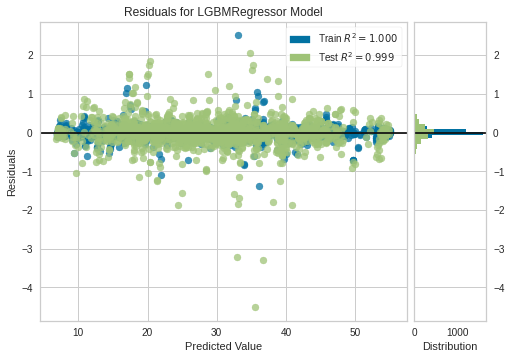

In [ ]:
plot_model(tuned_lightgbm)

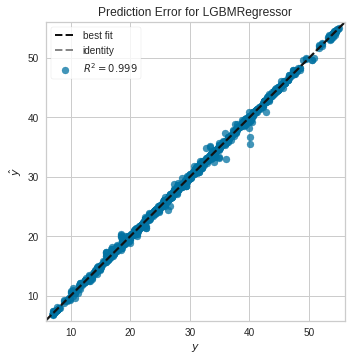

In [ ]:
plot_model(tuned_lightgbm, plot = 'error')

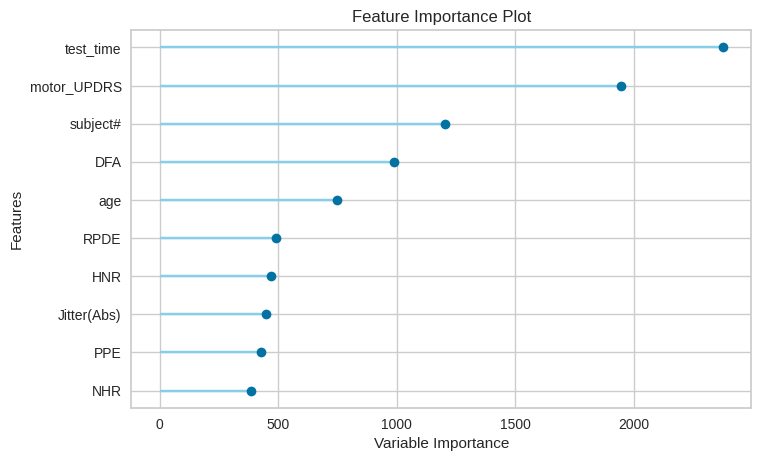

In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2137,0.1336,0.3655,0.9988,0.0145,0.0087


In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [ ]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0559,0.0075,0.0868,0.9999,0.004,0.0023


In [ ]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Label
0,1,72,0,40.652,29.435,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,0.02227,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500,36.607891
1,1,72,0,54.640,29.928,37.857,0.00476,0.000025,0.00226,0.00259,0.00678,0.02191,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844,37.880369
2,1,72,0,82.653,30.917,39.834,0.00537,0.000032,0.00236,0.00278,0.00709,0.02377,0.282,0.01001,0.01375,0.02395,0.03003,0.017115,24.204,0.46686,0.57984,0.19390,39.777020
3,1,72,0,96.633,31.776,41.034,0.00354,0.000024,0.00142,0.00150,0.00427,0.02107,0.171,0.00847,0.01040,0.01920,0.02540,0.015008,24.614,0.61348,0.60661,0.15881,41.118258
4,1,72,0,131.640,34.109,44.146,0.00571,0.000037,0.00296,0.00293,0.00889,0.02522,0.223,0.01260,0.01466,0.02145,0.03780,0.031546,23.129,0.52714,0.59220,0.18211,44.279317


In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.total_UPDRS, unseen_predictions.Label, 'R2')

0.9985

In [ ]:
save_model(final_lightgbm,'Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='total_UPDRS', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  

In [ ]:
saved_final_lightgbm = load_model('Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [ ]:
new_prediction.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Label
0,1,72,0,40.652,29.435,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,0.02227,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500,36.607891
1,1,72,0,54.640,29.928,37.857,0.00476,0.000025,0.00226,0.00259,0.00678,0.02191,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844,37.880369
2,1,72,0,82.653,30.917,39.834,0.00537,0.000032,0.00236,0.00278,0.00709,0.02377,0.282,0.01001,0.01375,0.02395,0.03003,0.017115,24.204,0.46686,0.57984,0.19390,39.777020
3,1,72,0,96.633,31.776,41.034,0.00354,0.000024,0.00142,0.00150,0.00427,0.02107,0.171,0.00847,0.01040,0.01920,0.02540,0.015008,24.614,0.61348,0.60661,0.15881,41.118258
4,1,72,0,131.640,34.109,44.146,0.00571,0.000037,0.00296,0.00293,0.00889,0.02522,0.223,0.01260,0.01466,0.02145,0.03780,0.031546,23.129,0.52714,0.59220,0.18211,44.279317


In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction.total_UPDRS, new_prediction.Label, 'R2')

0.9985